# 4. SVR

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## 4.1 生成模拟数据

In [3]:
np.random.seed(0)
X = np.sort(np.random.uniform(0,6,50),axis=0)
y = 2*np.sin(X)+0.1*np.random.randn(50)
X = X.reshape(-1,1)

## 4.2 SVR建模

In [4]:
from sklearn import svm

In [5]:
svr_rbf = svm.SVR(kernel='rbf',gamma=0.4,C=100)
svr_rbf.fit(X,y)

SVR(C=100, gamma=0.4)

In [6]:
svr_linear = svm.SVR(kernel='linear',C=100)
svr_linear.fit(X,y)

SVR(C=100, kernel='linear')

In [7]:
svr_poly = svm.SVR(kernel='poly',degree=3,C=100)
svr_poly.fit(X,y)

SVR(C=100, kernel='poly')

## 4.3 生成测试数据集

In [8]:
X_test = np.linspace(X.min(), 1.5*X.max(), 50)
np.random.seed(0)
y_test = 2*np.sin(X_test) + 0.1*np.random.randn(50)
X_test=X_test.reshape(-1,1)

## 4.4 预测并可视化

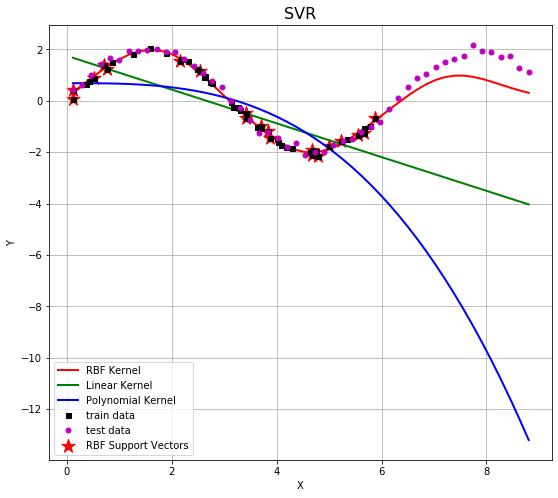

In [12]:
y_rbf = svr_rbf.predict(X_test)
y_linear = svr_linear.predict(X_test)
y_poly = svr_poly.predict(X_test)
sp = svr_rbf.support_
plt.figure(figsize=(9, 8),facecolor='w')
plt.scatter(X[sp], y[sp], s=200, c='r', marker='*', label='RBF Support Vectors')
plt.plot(X_test, y_rbf, 'r-', linewidth=2, label='RBF Kernel')
plt.plot(X_test, y_linear, 'g-', linewidth=2, label='Linear Kernel')
plt.plot(X_test, y_poly, 'b-', linewidth=2, label='Polynomial Kernel')
plt.plot(X, y, 'ks', markersize=5, label='train data')
plt.plot(X_test, y_test, 'mo', markersize=5, label='test data')
plt.legend(loc='lower left')
plt.title('SVR', fontsize=16)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()